<a href="https://colab.research.google.com/github/tungduongbk/tungduong/blob/master/Stantader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> SANTADER PRODUCT RECOMMENDATION REPORT</h1>




***Contributor: Phung Ngoc Tung Duong - 100%***

# TABLE OF CONTENTS
## [I. INTRODUCTION](#INTRODUCTION)
## [II. MODEL SELECTION](#MODEL-SELECTION)
## [III. FEATURE SELECTION](#FEATURE-SELECTION)
## [IV. TRAINING AND PARAMETERS TUNING](#TRAINING-AND-PARAMETERS-TUNING)
## [V. EVALUATION](#EVALUATION)
## [VI. CODE IMPLEMENTATION](#CODE-IMPLEMENTATION)

- [NUMERICAL ANALYSIS](#NUMERICAL-ANALYSIS)
- [CATEGORICAL ANALYSIS](#CATEGORICAL-ANALYSIS)
- [CATEGORICAL VISUALIZATION](#CATEGORICAL-VISUALIZATION)
- [PRODUCTS VISUALIZATION](#PRODUCTS-VISUALIZATION)
- [DATA PREPROCESSING AND TRAINING](#DATA-PREPROCESSING-AND-TRAINING)

## [VII. IMPROVEMENT](#IMPROVEMENT)
## [VIII. REFERENCE](#REFERENCE)

## INTRODUCTION

"In this competition, you are provided with 1.5 years of customers behavior data from Santander bank to predict what new products customers will purchase. The data starts at 2015-01-28 and has monthly records of products a customer has, such as "credit card", "savings account", etc. You will predict what additional products a customer will get in the last month, 2016-06-28, in addition to what they already have at 2016-05-28. These products are the columns named: ind_(xyz)_ult1, which are the columns #25 - #48 in the training data. You will predict what a customer will buy in addition to what they already had at 2016-05-28."

Santander is challenging Kagglers to predict which products their existing customers will use in the next month based on their past behavior and that of similar customers. With a more effective recommendation system in place, Santander can better meet the individual needs of all customers and ensure their satisfaction no matter where they are in life.

The training data consists of nearly 1 million users with monthly historical user and product data between January 2015 and May 2016. User data consists of 24 predictors including the age and income of the users. Product data consists of boolean flags for all 24 products and indicates whether the user owned the product in the respective months. The goal is to predict which new products the 929,615 test users are most likely to buy in June 2016. A product is considered new if it is owned in June 2016 but not in May 2016. The next table shows that the dataset description and meaning of columns.

**Dataset description:**

| Column Name | Description |
| --- | ---|
| **fecha_dato** | The table is partitioned for this column |
| **ncodepers** | Customer code |
| **ind_empleado** | Employee index : A active, B ex employed, F filial, N not employee, P pasive |
| **pais_residencia** | Customer's Country residence |
| **sexo** | Customer's sex |
| **age** | Age |
| **fecha_alta** | The date in which the customer became as the first holder of a contract in the bank |
| **ind_nuevo** | New customer Index: 1 if the customer registered in the last 6 months |
| **antiguedad** | Customer seniority (in months) |
| **indrel** | 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)|
| **ult_fec_cli_1t** | Last date as primary customer (if he isn't at the end of the month) |
| **indrel_1mes** | Customer type at the begining of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner) |
| **tiprel_1mes**	 |  Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential) |
| **indresi** | Residence index (S (Yes) or N (No) if the residence country is the same than the bank country) |
| **indext** | Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country) |
| **conyuemp** | Spouse index. 1 if the customer is spouse of an employee |
| **canal_entrada** | Channel used by the customer to join |
| **indfall**| Deceased index. N/S|
| **tipodom** |  Addres type. 1, primary address |
| **cod_prov** | Province code (customer's address) |
| **nomprov** | Province name |
| **ind_actividad_cliente** | Activity index (1, active customer; 0, inactive customer) |
| **renta** | Gross income of the household |
| **segmento** | segmentation: 01 - VIP, 02 - Individuals 03 - college graduated |
| ** 25 - 48 ** | Banking products |

## MODEL SELECTION

Our recommendation system is based on gradient boosted classification trees. There are a number of machine learning software packages that implement this concept, but the most popular by far in the data science community, and the one we used here, is [XGBoost](https://xgboost.readthedocs.io/en/latest/). It’s really a fantastic piece of software that is fast, parallel, and supports extra features like L1/L2 regularization for the ensemble weights. At the time of this writing, XGBoost is used in more than half of winning solutions in machine learning competitions on Kaggle.

Gradient boosting is a machine learning strategy where you build many simple models that are called weak learners. Commonly these are decision trees, but the idea can be generalized to essentially any model. Each model you build focuses on the mistakes of the previous one(s), which is achieved by reweighting the input data to the ith weak learner based upon some error metric between the first i-1 models and the data. The output of the model as a whole is then a combination of the predictions made by each of the many weak learners.

Multiclass classification. A single XGBoost model was trained using where the target variable was the product that was added. Using objective = "multi:softprob", probabilities for each class were obtained all at once. For customers that added multiple products, a single one was chosen at random as the target.

## FEATURE SELECTION

The model above produce the probability that a customer will own or add each of the 22 products. There were actually 24 products, but two of them, ind_aval_fin_ult1 and ind_ahor_fin_ult1, were discarded entirely for being exceedingly rare.
<img src = "img.png" >
The popularity of products evolves over time but there are also yearly seasonal causes that impact the new product counts. June 2015 (left dotted line in the plot above) is especially interesting since it contains a quite different new product distribution (Cco_fin and Reca_fin in particular) compared to the other months, probably because June marks the end of the tax year in Spain. It will turn out later on in the analysis that the June 2015 new product information is by far the best indicator of new products in June 2016, especially because of divergent behavior in the tax product (Reca_fin) and the checking account (cco_fin).

The most popular forum post - [When less is more!](https://www.kaggle.com/c/santander-product-recommendation/discussion/25579) suggests to restrict the modeling effort to new product records in June 2015 to predict June 2016. A crucial insight which changed the landscape of the competition after it was made public by one of the top competitors. We can get a MAP@7 ~0.027 score on LeaderBoard by only training Jun 2015 and June 2016. That was minimum the datasets!!!!.

The second realization was that the most useful features were those related to product ownership by added the product ownership status for each of the previous 2-5 months as features in addition to the most recent month and applied the repeated single-class classification strategy to produce a MAP@7 greater than 0.03 with a single mode. These lagged ownership features were limited to 5 months because the earliest data was from January 2015 and thus this was the furthest back we could go.

So generally, The feature selection was produced following: Categorical, Numerical and Ownership lag features of 5 months.

Training data is entirely data from 2015-01 to 2015-05 and the label outputs are the added products on 2015-06. 
Also, We will process data from 2016-01 to 2016-05 and predict on 2016-06. 

The feature selection following below!:

**Categorical Features:**

- *sexo* : gender
- *ind_nuevo* : is the customer new?
- *segmento* : segmentation
- *indext* : Foreigner index
- *indresi* : Residence index
- *indrel* : primary customer at beginning but not end of month
- *indrel_1mes* : Customer type at the begining of the month
- *indfall* : Deceased index.
- *tiprel_1mes* : Customer relation type at the beginning of the month
- *ind_actividad_cliente* : customer active?
- *tipodom* : Addres type. 1, primary address
- *pais_residencia* : Customer's Country residence
- *canal_entrada* : 	Channel used by the customer to join

**Numerical Features:**
- *age* : age in years
- *antiguedad* : seniority in months
- *renta* : gross income by province

**Engineered Feature:**
- *ownership* : binary feature indicating whether or not each product was owned 1-5 months ago (5x22 = 110 total features)
- *added products*: binary feature indicating whether or not each product was added in last month.

## TRAINING AND PARAMETERS TUNING

As mentioned above, the XGBoost Model was selected for multi-classification problem. That would be follow the parameters below:

	param['objective'] = 'multi:softprob'
	param['eta'] = 0.05
	param['max_depth'] = 8
	param['silent'] = 0
	param['num_class'] = 22
	param['eval_metric'] = "mlogloss"
	param['min_child_weight'] = 14
	param['subsample'] = 0.8
	param['colsample_bytree'] = 0.8
  
 Different with 'multi:softmax', 'multi:softprob' will give us a vector that contain all probabilities instead of returning the max value. We need all probabilities to ranking the products which will be recommended to customer.
  Some important parameters can effect to perfomance of model and reduce overfitting.
  - **eta (default=0.3):**
      - Analogous to learning rate in GBM
      - Makes the model more robust by shrinking the weights on each step
      - Typical final values to be used: 0.01-0.2
  - **min_child_weight (default=1):**
      - Defines the minimum sum of weights of all observations required in a child.
      - Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
      - Too high values can lead to under-fitting
  - **max_depth (default=6):**
      - The maximum depth of a tree
      - Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
      - Typical values: 3-10
  - **subsample(default=1):**
      -  Denotes the fraction of observations to be randomly samples for each tree.
      - Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.
      - Typical values: 0.5-1
  
  - **colsample_bytree (default=1):**
      -  Denotes the fraction of columns to be randomly samples for each tree.
      - Typical values: 0.5-1
 
 
There are many parameters([detail](https://xgboost.readthedocs.io/en/latest/parameter.html)) need to be tuned. It's just relatively to choose these parameter and we should spend more time for parameter estimation. Using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) function in Scikit Learn can generate multiple values of each parameter at the same time. It's useful for hyperparameters tuning to get the best models since we can compare each other.

## EVALUATION

 The results are evaluated according to the Mean Average Precision @ 7 (MAP@7) - See this [post](http://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html) for more detail:
 <img src = "map.png" >
 Specifically the challenge was to recommend the top 7 products to each customer. The scoring was evaluated using mean average precision at 7 (MAP@7). The intuition behind this scoring metric is that it rewards solutions where the person actually added one of the items you recommended, and you get more points if the purchased item was earlier in your list of recommendations. You don’t lose any points for recommending products to people that don’t buy anything. Therefore, you should recommend exactly 7 products to each customer, and place the most likely ones earlier in your list.

**Final Result: 0.0301151 on Private Score**

 

## CODE IMPLEMENTATION

In [0]:
import pandas as pd

In [0]:
df_train = pd.read_csv('gdrive/My Drive/data/santader/train_ver2.csv')
df_test = pd.read_csv('gdrive/My Drive/data/santader/test_ver2.csv')

In [0]:
print('Number of rows in train set', df_train.shape[0])
print('Number of rows in test set', df_test.shape[0])

print('Number of Unique Customer in train set:', len(set(df_train.ncodpers.unique())))
print('Number of Unique Customer in test set:', len(set(df_test.ncodpers.unique())))

Number of rows in train set 13647309
Number of rows in test set 929615
Number of Unique Customer in train set: 956645
Number of Unique Customer in test set: 929615


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [0]:
del df_test
del df_train

Load sample data set - 7 million rows for visualization

In [0]:
df_train_sample = pd.read_csv('gdrive/My Drive/data/santader/train_ver2.csv',
                              dtype={"sexo":str, "ind_nuevo":str, 
                                      "ult_fec_cli_1t":str, 
                                      "indext":str}, nrows=7e6)

In [0]:
n = 500000
unique_ids = pd.Series(df_train_sample["ncodpers"].unique())
unique_id = unique_ids.sample(n)
df_train_sample = df_train_sample[df_train_sample.ncodpers.isin(unique_id)]

In [0]:
df_train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3872529 entries, 0 to 6999998
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                object
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1     

Check how many missing value in every columns

In [0]:
df_train_sample.isnull().sum()

fecha_dato                     0
ncodpers                       0
ind_empleado               15695
pais_residencia            15695
sexo                       15722
age                            0
fecha_alta                 15695
ind_nuevo                  15695
antiguedad                     0
indrel                     15695
ult_fec_cli_1t           3866546
indrel_1mes                58168
tiprel_1mes                58168
indresi                    15695
indext                     15695
conyuemp                 3871938
canal_entrada              66099
indfall                    15695
tipodom                    15695
cod_prov                   35542
nomprov                    35542
ind_actividad_cliente      15695
renta                     691650
segmento                   66715
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_f

We can see that the number "15695" appeared in some columns. That might be the same rows . So, let check it is the same rows or not?

In [0]:
df_train_sample.loc[df_train_sample["pais_residencia"].isnull(),["ind_empleado","ind_nuevo","indresi"]].head()

,ind_empleado,ind_nuevo,indresi
261,NaN,NaN,NaN
1029,NaN,NaN,NaN
1154,NaN,NaN,NaN
1850,NaN,NaN,NaN
1886,NaN,NaN,NaN


Yes, It's the same rows

There are two columns **"ult_fec_cli_1t"** and **"conyuemp"** with almost all values are missing. So, I will delete them from the dataframe.

In [0]:
df_train_sample = df_train_sample.drop(["ult_fec_cli_1t", "conyuemp"], axis=1) 

In [0]:
df_train_sample.ncodpers.count()

3872529

### NUMERICAL ANALYSIS

Change data type some columns

In [0]:
df_train_sample.age = pd.to_numeric(df_train_sample.age, errors = 'coerce')
df_train_sample.antiguedad = pd.to_numeric(df_train_sample.antiguedad, errors = 'coerce')
df_train_sample.indrel_1mes = pd.to_numeric(df_train_sample.indrel_1mes, errors = 'coerce')

There are many columns with missing values. Let's see how can we deal with them. The column **"renta"** or **"age"** contains a lot of missing values. I am going to replace missing values in the income column by the average **"age"** and **"renta"** of the customers in the same province.

Try to visualize and process **"age"** first,

Text(0, 0.5, 'Count')

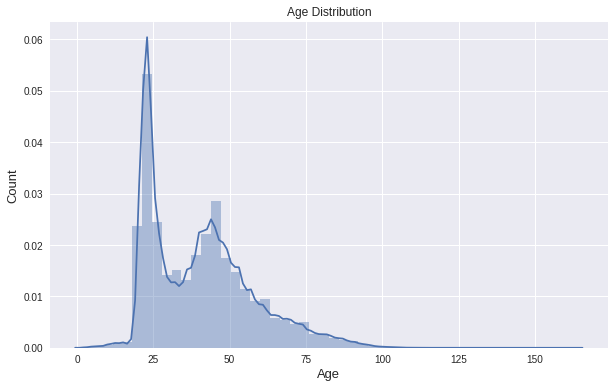

In [0]:
plt.figure(figsize=(10,6))
sns.distplot(df_train_sample["age"].dropna(),
               bins=50)
plt.title("Age Distribution")
plt.xlabel("Age", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

In [0]:
df_train_sample.loc[df_train_sample.age < 18,"age"]  = df_train_sample.loc[(df_train_sample.age >= 18) & (df_train_sample.age <= 30),"age"].mean(skipna=True)
df_train_sample.loc[df_train_sample.age > 100,"age"] = df_train_sample.loc[(df_train_sample.age >= 30) & (df_train_sample.age <= 100),"age"].mean(skipna=True)
df_train_sample["age"].fillna(df_train_sample["age"].mean(),inplace=True)
df_train_sample["age"] = df_train_sample["age"].astype(int)

Text(0, 0.5, 'Count')

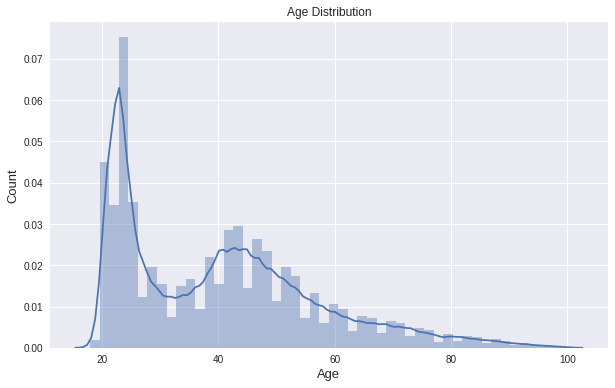

In [0]:
plt.figure(figsize=(10,6))
sns.distplot(df_train_sample["age"],
               bins=50)
plt.title("Age Distribution")
plt.xlabel("Age", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

Next, I'm gonna to processing missing values of **"Nomprov"**

In [0]:
df_train_sample.nomprov.unique()

array(['MALAGA', 'CIUDAD REAL', 'ZARAGOZA', 'LEON', 'CACERES', 'GIRONA',
       'ZAMORA', 'BARCELONA', 'BURGOS', 'HUESCA', 'NAVARRA', 'TOLEDO',
       'SALAMANCA', 'SEGOVIA', 'LUGO', 'LERIDA', 'ALICANTE', 'SEVILLA',
       'CANTABRIA', 'BALEARS, ILLES', 'MADRID', 'VALENCIA', 'TERUEL',
       'CORUÑA, A', 'CUENCA', 'BIZKAIA', 'CASTELLON', 'ALBACETE', 'AVILA',
       'BADAJOZ', 'GIPUZKOA', 'CADIZ', nan, 'ALMERIA', 'PONTEVEDRA',
       'OURENSE', 'PALENCIA', 'VALLADOLID', 'RIOJA, LA', 'PALMAS, LAS',
       'CORDOBA', 'HUELVA', 'GRANADA', 'JAEN', 'ASTURIAS',
       'SANTA CRUZ DE TENERIFE', 'MURCIA', 'GUADALAJARA', 'SORIA',
       'TARRAGONA', 'ALAVA', 'MELILLA', 'CEUTA'], dtype=object)

In [0]:
df_train_sample.loc[df_train_sample.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"

In [0]:
df_train_sample.loc[df_train_sample.nomprov.isnull(),"nomprov"] = "UNKNOWN"

In [0]:
incomes = df_train_sample.loc[df_train_sample.renta.notnull(),:].groupby("nomprov").agg({"renta":{"MedianIncome":np.median}})
incomes.sort_values(by=("renta","MedianIncome"),inplace=True)
incomes.reset_index(inplace=True)
incomes.nomprov = incomes.nomprov.astype("category", categories=[i for i in df_train_sample.nomprov.unique()],ordered=False)
incomes.head()

,nomprov,renta
,,MedianIncome
0,CIUDAD REAL,61950.540
1,BADAJOZ,62159.970
2,LERIDA,64114.515
3,LUGO,64858.440
4,CASTELLON,66223.035


([<matplotlib.axis.YTick at 0x7f747668a240>,
 <a list of 5 Text yticklabel objects>)

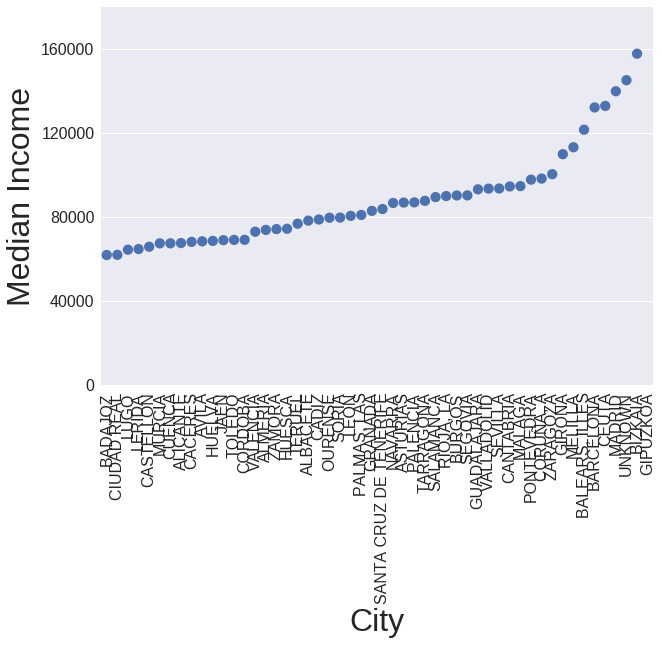

In [0]:
sns.factorplot(data=incomes,
               x="nomprov",
               y=("renta","MedianIncome"),
               order=(i for i in incomes.nomprov),
               size=6,
               aspect=1.5,
               scale=1.0,
               linestyles="None")
plt.xticks(rotation=90)
plt.tick_params(labelsize=16)
plt.ylabel("Median Income",size=32)
plt.xlabel("City",size=32)
plt.ylim(0,180000)
plt.yticks(range(0,180000,40000))

In [0]:
df_train_sample.loc[df_train_sample.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
df_train_sample.loc[df_train_sample.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

All columns have numeric data type was processed missing values.
Let go to categories data type

### CATEGORICAL ANALYSIS

In [0]:
string_data = df_train_sample.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]
for col in missing_columns:
    print("Unique values for {0}:\n{1}\n".format(col,string_data[col].unique()))
del string_data

Unique values for ind_empleado:
['N' nan 'A' 'B' 'F' 'S']

Unique values for pais_residencia:
['ES' nan 'CH' 'CL' 'IE' 'AT' 'FR' 'GB' 'BE' 'AR' 'US' 'DE' 'IT' 'CO' 'HN'
 'NL' 'AL' 'MX' 'FI' 'CN' 'PL' 'BR' 'NI' 'HK' 'AD' 'AE' 'PT' 'PR' 'PE'
 'IL' 'IN' 'RO' 'RU' 'MA' 'GT' 'SN' 'MR' 'NO' 'GR' 'EC' 'EE' 'CZ' 'ET'
 'VE' 'CM' 'CI' 'QA' 'LU' 'PA' 'BG' 'UA' 'AU' 'BY' 'SE' 'BO' 'KE' 'CA'
 'MD' 'SK' 'AO' 'CU' 'HR' 'EG' 'UY' 'GA' 'GE' 'DZ' 'ZA' 'DK' 'TH' 'SV'
 'CR' 'NG' 'PK' 'JP' 'TN' 'SA' 'SG' 'DO' 'GH' 'RS' 'VN' 'PH' 'KW' 'GQ'
 'NZ' 'GI' 'PY' 'GN' 'CG' 'LV' 'LT' 'KR' 'ML' 'MK' 'GW' 'MZ' 'TW' 'IS'
 'LY' 'CF' 'GM' 'KZ' 'CD' 'BZ' 'TR' 'ZW' 'HU']

Unique values for sexo:
['V' 'H' nan]

Unique values for fecha_alta:
['2012-08-10' '2012-08-16' '2012-08-14' ... '2015-10-24' '2015-10-30'
 '2015-10-22']

Unique values for ind_nuevo:
[' 0' nan ' 1']

Unique values for tiprel_1mes:
['I' 'A' nan 'P' 'R' 'N']

Unique values for indresi:
['S' nan 'N']

Unique values for indext:
['S' 'N' nan]

Unique values f

In [0]:
df_train_sample['ind_empleado'].value_counts()

N    3856760
B       1087
F        816
A        775
S          9
Name: ind_empleado, dtype: int64

Try to fill NA with common category

In [0]:
df_train_sample.loc[df_train_sample.ind_empleado.isnull(), "ind_empleado"] = "N"

### CATEGORICAL VISUALIZATION

Number of unique values in  ind_empleado  :  6


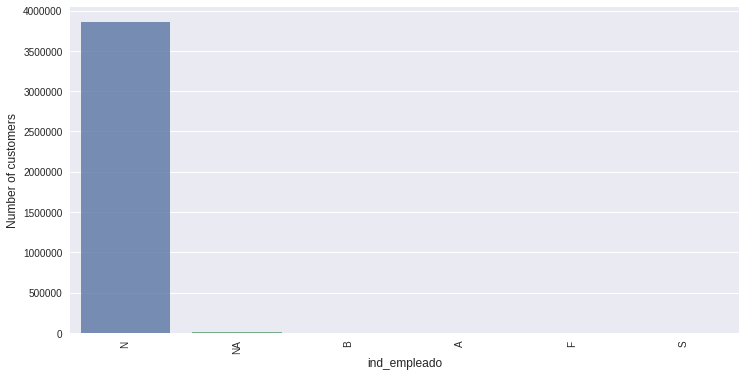


Number of unique values in  pais_residencia  :  108


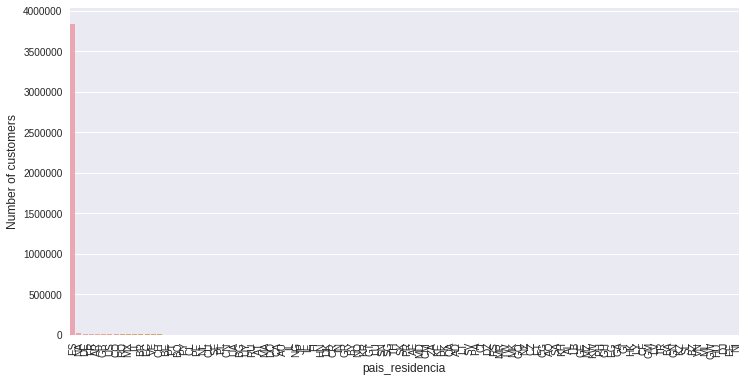


Number of unique values in  sexo  :  3


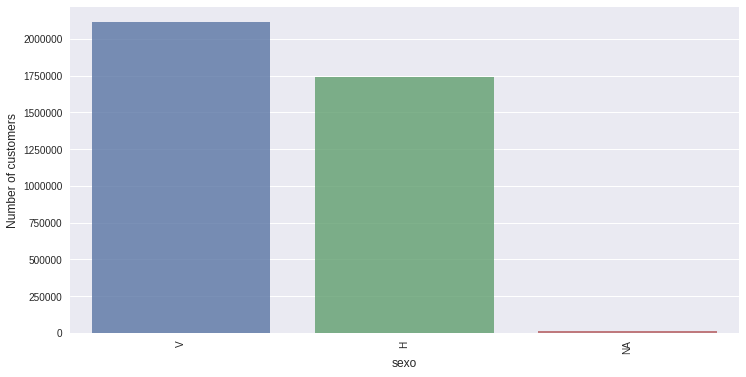


Number of unique values in  ind_nuevo  :  3


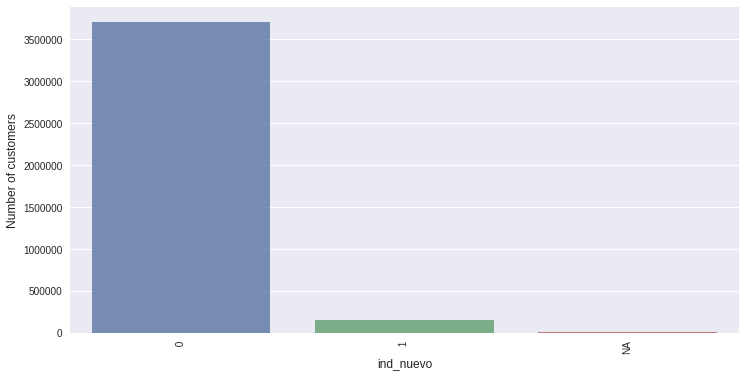


Number of unique values in  indrel  :  3


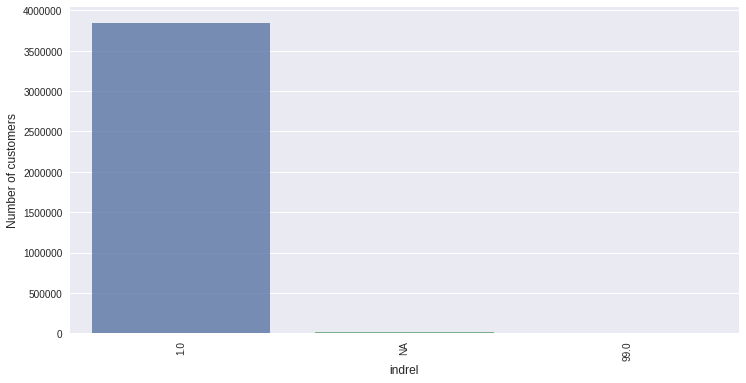


Number of unique values in  indrel_1mes  :  5


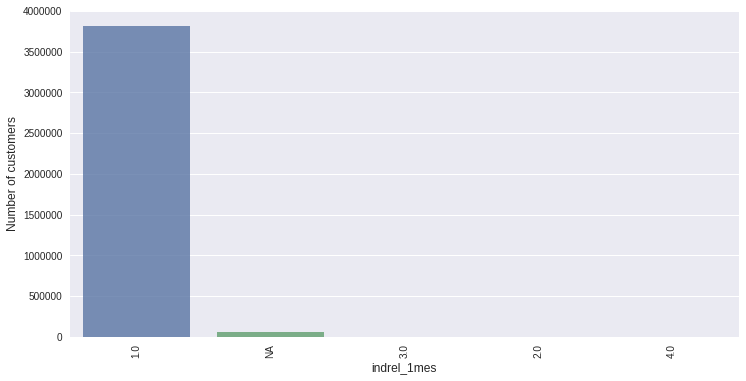


Number of unique values in  tiprel_1mes  :  5


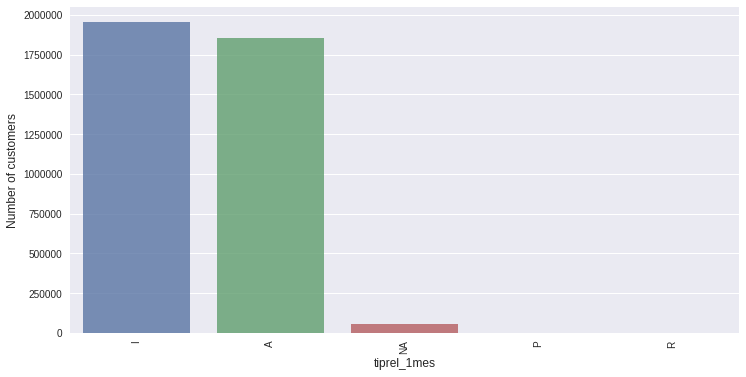


Number of unique values in  indresi  :  3


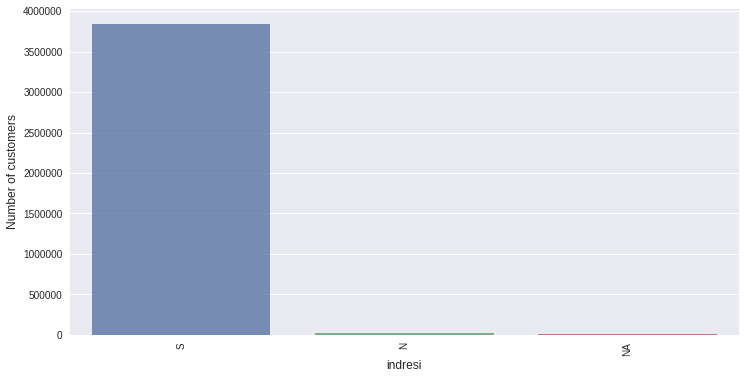


Number of unique values in  indext  :  3


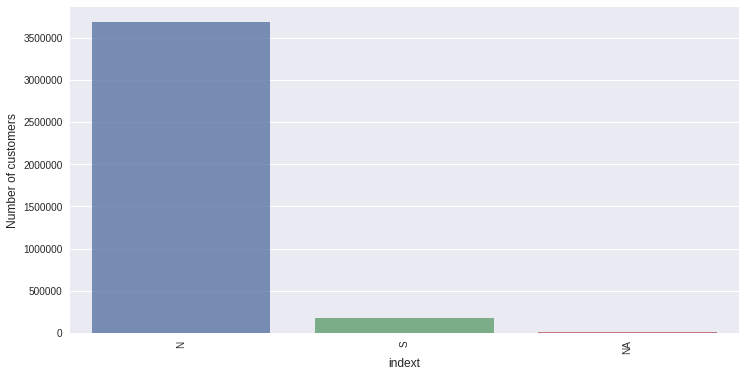


Number of unique values in  canal_entrada  :  157


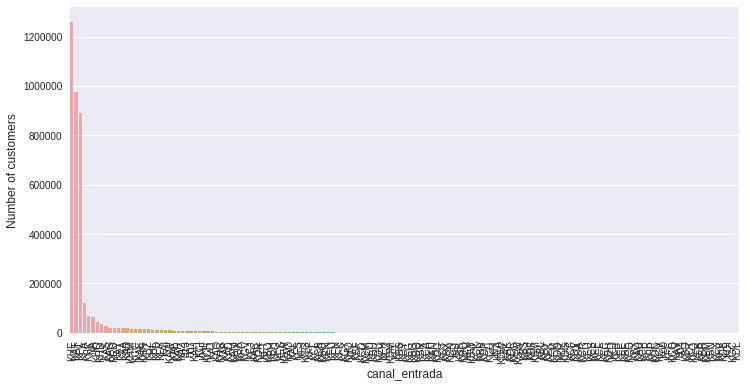


Number of unique values in  indfall  :  3


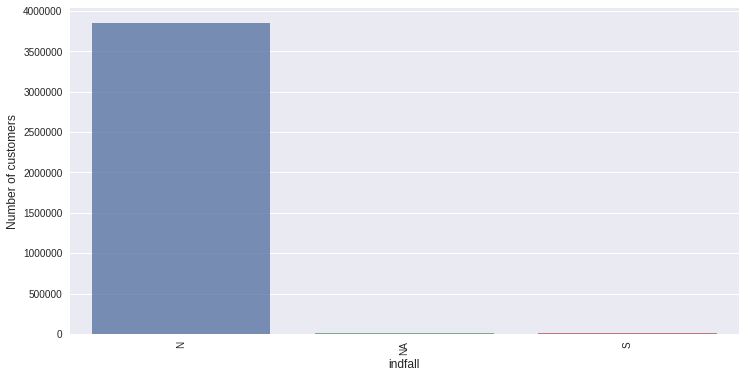


Number of unique values in  tipodom  :  2


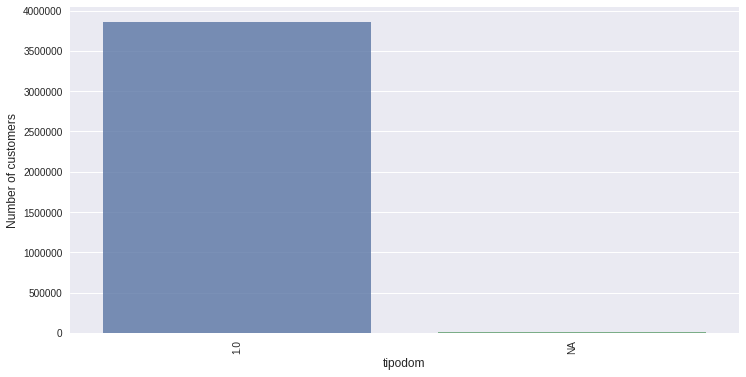


Number of unique values in  cod_prov  :  53


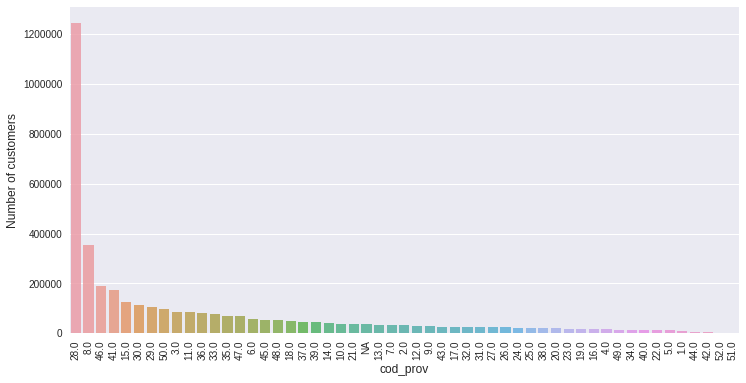


Number of unique values in  nomprov  :  53


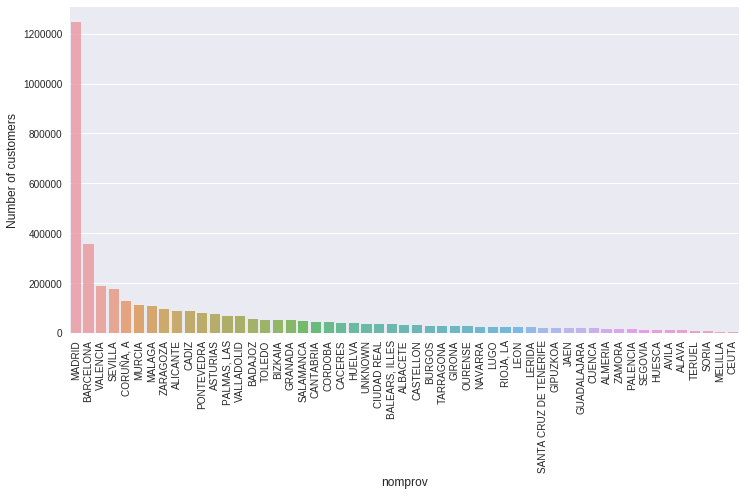


Number of unique values in  ind_actividad_cliente  :  3


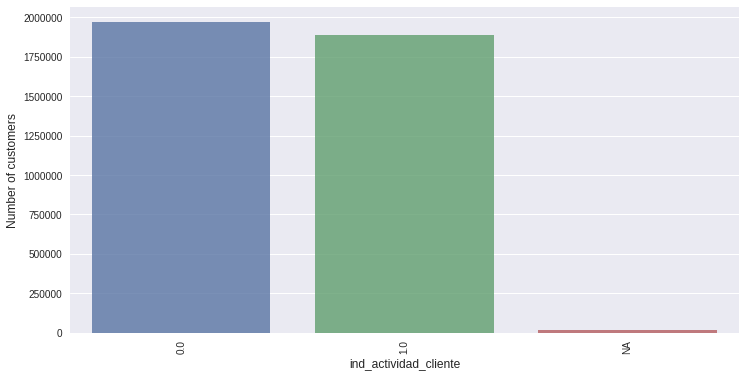


Number of unique values in  segmento  :  4


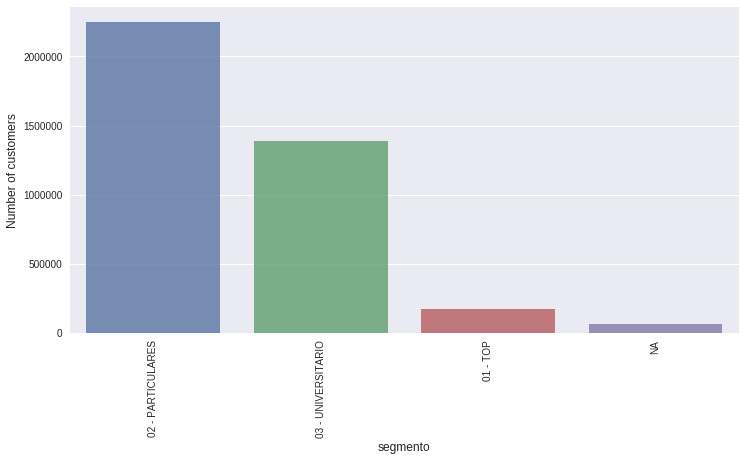

In [0]:
cols = ["ind_empleado","pais_residencia","sexo","ind_nuevo","indrel","indrel_1mes","tiprel_1mes","indresi","indext","canal_entrada","indfall","tipodom","cod_prov","nomprov","ind_actividad_cliente","segmento"]
for col in cols:
    df_sample = df_train_sample.fillna('NA')
    len_unique = len(df_sample[col].unique())
    print("Number of unique values in ",col," : ",len_unique)
    if len_unique < 200:
        agg_df = df_sample[col].value_counts()
        plt.figure(figsize=(12,6))
        sns.barplot(agg_df.index, agg_df.values, alpha=0.8)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Number of customers', fontsize=12)
        plt.xticks(rotation='vertical')
        plt.show()
    print()

### PRODUCTS VISUALIZATION

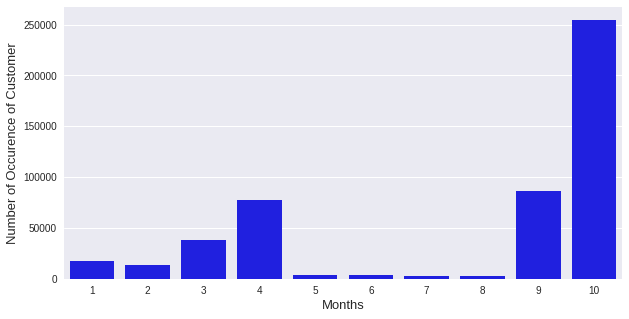

In [0]:
number_occur = df_train_sample.groupby('ncodpers').size().value_counts()
plt.figure(figsize=(10,5))
sns.barplot(number_occur.index, number_occur.values, color = 'blue')
plt.xlabel('Months', fontsize = 13)
plt.ylabel('Number of Occurence of Customer', fontsize = 13)
plt.show()

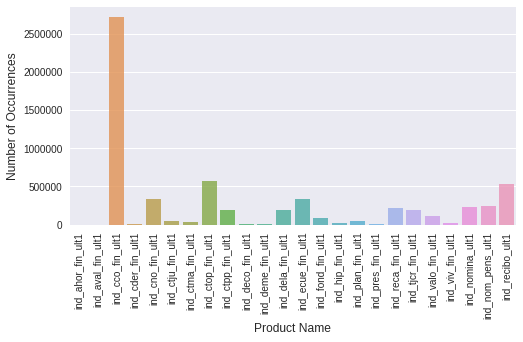

In [0]:
target_counts = df_train_sample[df_train_sample.columns[22:49]].sum(axis=0)
#print(target_counts)
plt.figure(figsize=(8,4))
sns.barplot(target_counts.index, target_counts.values, alpha=0.8)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

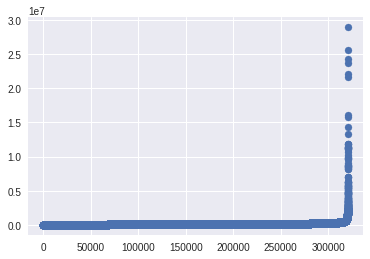

In [0]:
unique_values = np.sort(df_train_sample.renta.unique())
plt.scatter(range(len(unique_values)), unique_values)
plt.show()

In [0]:
df_train_sample.loc[df_train_sample.renta.isnull(), 'renta'] = df_train_sample.renta.dropna().median()
print("Median Renta:", int(df_train_sample.renta.dropna().median()))

Median Renta: 101963


In [0]:
df_train_sample.loc[df_train_sample.antiguedad.isnull(), 'antiguedad'] = 0
df_train_sample.loc[df_train_sample.antiguedad < 0, 'antiguedad'] = 0

In [0]:
df_train_sample.age.isnull().sum()

 **See how the targets are distributed based on the numerical variables present in the data**

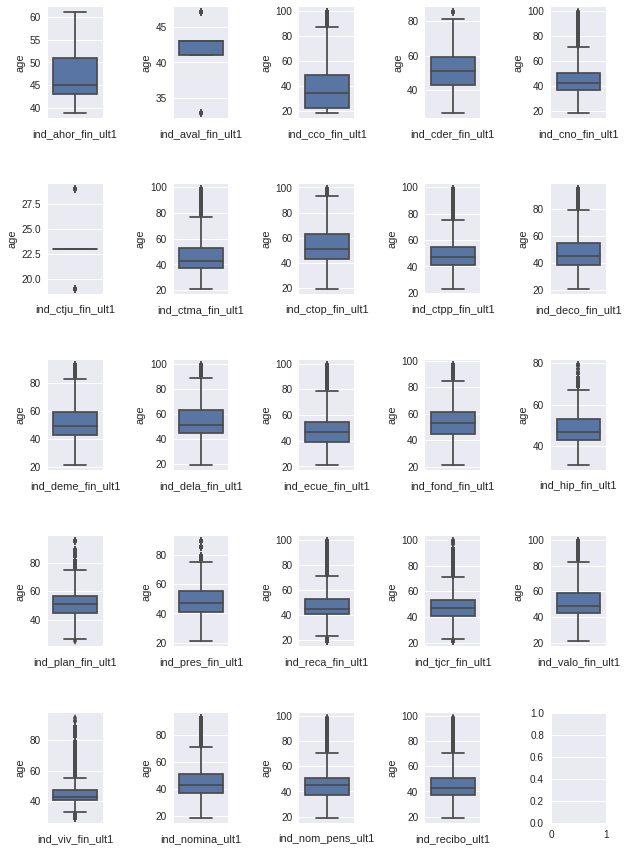

In [0]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,15))
plt.subplots_adjust(wspace=1.3, hspace=0.6)
fig_row=0
for col_id in range(24, 48):
    ax_id=col_id-24
    fig_label=df_train_sample.columns[col_id]
    feat=df_train_sample.columns[col_id]
    fig_col=(col_id+1)%5
    box_plot=sns.boxplot(y='age', data=df_train_sample[(df_train_sample[feat]==1) & df_train_sample.age], ax=axes[fig_row][fig_col])
    box_plot.set(xlabel=fig_label)
    if fig_col==4: fig_row+=1

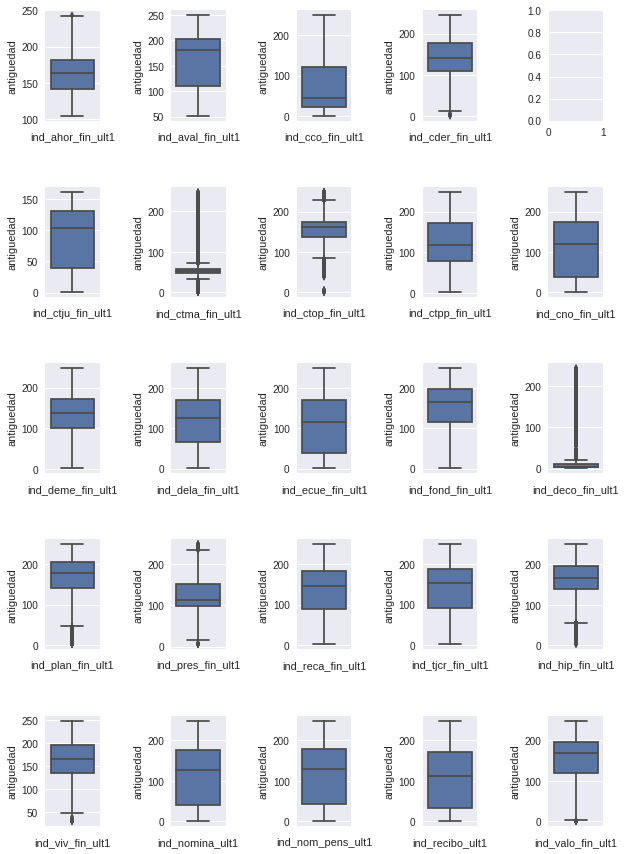

In [0]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,15))
plt.subplots_adjust(wspace=1.3, hspace=0.6)
fig_row=0
for col_id in range(24, 48):
    ax_id=col_id-24
    fig_label=df_train_sample.columns[col_id]
    feat=df_train_sample.columns[col_id]
    fig_col=(col_id+1)%5
    box_plot=sns.boxplot(y='antiguedad', data=df_train_sample[(df_train_sample[feat]==1) & df_train_sample.antiguedad], ax=axes[fig_row][fig_col])
    box_plot.set(xlabel=fig_label)
    if fig_col==3: fig_row+=1

Seems all these numerical variables have some predictive power since they show some different behavior between 0's and 1's.

 **See targets are distributed based on the 'cod_prov'**

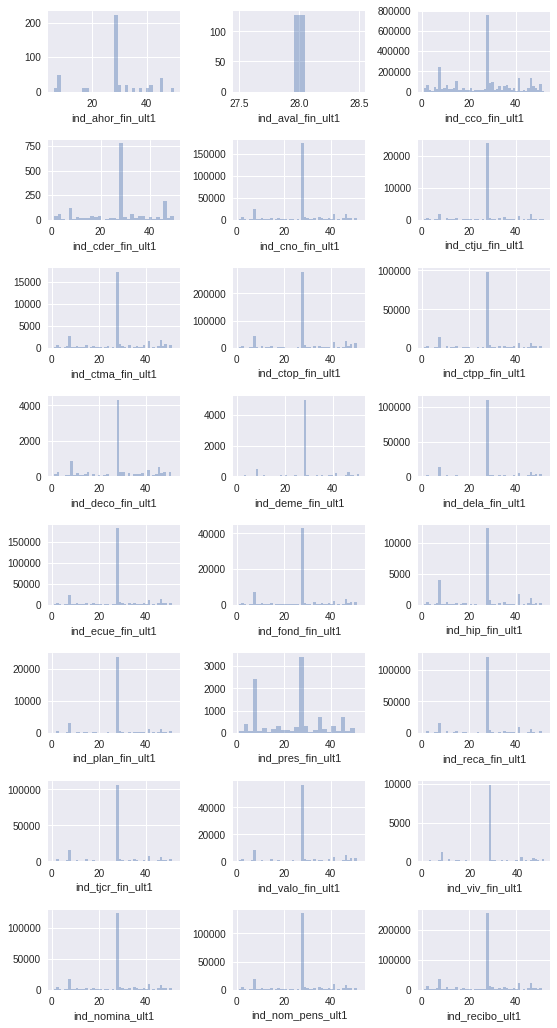

In [0]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(9,18))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
fig_row=0
for col_id in range(24, 48):
    ax_id=col_id-24
    fig_label= df_train_sample.columns[col_id]
    feat=df_train_sample.columns[col_id]
    fig_col=col_id%3
    sns.distplot(df_train_sample.cod_prov[(df_train_sample[feat]==1) & df_train_sample['cod_prov']], kde=False, 
                 axlabel=fig_label, ax=axes[fig_row][fig_col])
    if fig_col==2: fig_row+=1

 **See targets are distributed based on the 'cod_prov'**

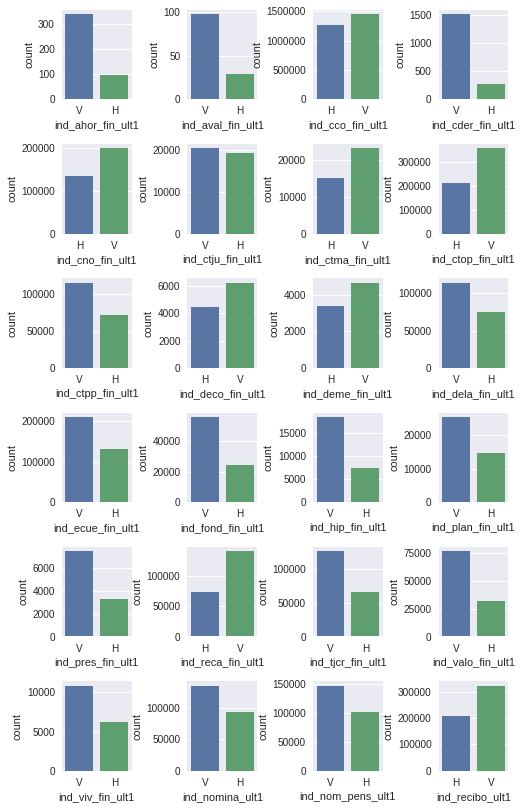

In [0]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(8,14))
plt.subplots_adjust(wspace=0.8, hspace=0.5)
# fig.tight_layout()
fig_row=0
for col_id in range(24, 48):
    ax_id=col_id-24
    fig_label= df_train_sample.columns[col_id]
    feat=df_train_sample.columns[col_id]
    fig_col=(col_id)%4
    countplot=sns.countplot(x='sexo', data=df_train_sample[(df_train_sample[feat]==1) & (df_train_sample['sexo'].notna())],ax=axes[fig_row][fig_col])
    countplot.set(xlabel=fig_label)
    if fig_col==3: fig_row+=1

### DATA PREPROCESSING AND TRAINING

**Functions:**
- *Process_products()*: Get boolean value of each product column
- *Process_Index()*: Get index of Customers
- *Process_Age()*: Process missing value of Age by calculating mean age of all Customer and get as a numerical feature for training data
- *Process_Seniority()*: Process missing value of "Seniority" and get as a numerical feature for training data
- *Process_Renta()*: Process missing value of "Renta" and get as a numerical feature for training data
- *DataPreprocessing()*: This function process all data at the same time. And return lists of feature and label before we put into model.
- *runXGB()*: Set parameters and run XGB model

In [0]:
'''Code was modified from SRK'''
import csv
import datetime
import numpy as np
import pandas as pd
import xgboost as xgb

categories_dict = {'ind_empleado'  : {'MISS':0, 'N':1, 'B':2, 'F':3, 'A':4, 'S':5},
'sexo'          : {'V':0, 'H':1, 'MISS':2},
'ind_nuevo'     : {'0':0, '1':1, 'MISS':1},
'indrel'        : {'1':0, '99':1, 'MISS':1},
'indrel_1mes'   : {'MISS':0, '1.0':1, '1':1, '2.0':2, '2':2, '3.0':3, '3':3, '4.0':4, '4':4, 'P':5},
'tiprel_1mes'   : {'MISS':0, 'I':1, 'A':2, 'P':3, 'R':4, 'N':5},
'indresi'       : {'MISS':0, 'S':1, 'N':2},
'indext'        : {'MISS':0, 'S':1, 'N':2},
'indfall'       : {'MISS':0, 'S':1, 'N':2},
'tipodom'       : {'MISS':0, '1':1},
'ind_actividad_cliente' : {'0':0, '1':1, 'MISS':2},
'segmento'      : {'02 - PARTICULARES':0, '03 - UNIVERSITARIO':1, '01 - TOP':2, 'MISS':3},
'pais_residencia' : {'LV': 102, 'BE': 12, 'BG': 50, 'BA': 61, 'BM': 117, 'BO': 62, 'JP': 82, 'JM': 116, 'BR': 17,
                     'BY': 64, 'BZ': 113, 'RU': 43, 'RS': 89, 'RO': 41, 'GW': 99, 'GT': 44, 'GR': 39, 'GQ': 73,
                     'GE': 78, 'GB': 9, 'GA': 45, 'GN': 98, 'GM': 110, 'GI': 96, 'GH': 88, 'OM': 100, 'HR': 67, 
                     'HU': 106, 'HK': 34, 'HN': 22, 'AD': 35, 'PR': 40, 'PT': 26, 'PY': 51, 'PA': 60, 'PE': 20, 
                     'PK': 84, 'PH': 91, 'PL': 30, 'EE': 52, 'EG': 74, 'ZA': 75, 'EC': 19, 'AL': 25, 'VN': 90, 
                     'ET': 54, 'ZW': 114, 'ES': 0, 'MD': 68, 'UY': 77, 'MM': 94, 'ML': 104, 'US': 15, 'MT': 118, 
                     'MR': 48, 'UA': 49, 'MX': 16, 'IL': 42, 'FR': 8, 'MA': 38, 'FI': 23, 'NI': 33, 'NL': 7, 
                     'NO': 46, 'NG': 83, 'NZ': 93, 'CI': 57, 'CH': 3, 'CO': 21, 'CN': 28, 'CM': 55, 'CL': 4, 
                     'CA': 2, 'CG': 101, 'CF': 109, 'CD': 112, 'CZ': 36, 'CR': 32, 'CU': 72, 'KE': 65, 'KH': 95,
                     'SV': 53, 'SK': 69, 'KR': 87, 'KW': 92, 'SN': 47, 'SL': 97, 'KZ': 111, 'SA': 56, 'SG': 66,
                     'SE': 24, 'DO': 11, 'DJ': 115, 'DK': 76, 'DE': 10, 'DZ': 80, 'MK': 105, 'MISS': 1, 'LB': 81,
                     'TW': 29, 'TR': 70, 'TN': 85, 'LT': 103, 'LU': 59, 'TH': 79, 'TG': 86, 'LY': 108, 'AE': 37,
                     'VE': 14, 'IS': 107, 'IT': 18, 'AO': 71, 'AR': 13, 'AU': 63, 'AT': 6, 'IN': 31, 'IE': 5,
                     'QA': 58, 'MZ': 27},
'canal_entrada' : {'013': 49, 'KHP': 160, 'KHQ': 157, 'KHR': 161, 'KHS': 162, 'KHK': 10, 'KHL': 0, 'KHM': 12, 
                   'KHN': 21, 'KHO': 13, 'KHA': 22, 'KHC': 9, 'KHD': 2, 'KHE': 1, 'KHF': 19, '025': 159, 'KAC': 57, 
                   'KAB': 28, 'KAA': 39, 'KAG': 26, 'KAF': 23, 'KAE': 30, 'KAD': 16, 'KAK': 51, 'KAJ': 41, 
                   'KAI': 35, 'KAH': 31, 'KAO': 94, 'KAN': 110, 'KAM': 107, 'KAL': 74, 'KAS': 70, 'KAR': 32, 
                   'KAQ': 37, 'KAP': 46, 'KAW': 76, 'KAV': 139, 'KAU': 142, 'KAT': 5, 'KAZ': 7, 'KAY': 54, 
                   'KBJ': 133, 'KBH': 90, 'KBN': 122, 'KBO': 64, 'KBL': 88, 'KBM': 135, 'KBB': 131, 'KBF': 102, 
                   'KBG': 17, 'KBD': 109, 'KBE': 119, 'KBZ': 67, 'KBX': 116, 'KBY': 111, 'KBR': 101, 'KBS': 118,
                   'KBP': 121, 'KBQ': 62, 'KBV': 100, 'KBW': 114, 'KBU': 55, 'KCE': 86, 'KCD': 85, 'KCG': 59,
                   'KCF': 105, 'KCA': 73, 'KCC': 29, 'KCB': 78, 'KCM': 82, 'KCL': 53, 'KCO': 104, 'KCN': 81, 
                   'KCI': 65, 'KCH': 84, 'KCK': 52, 'KCJ': 156, 'KCU': 115, 'KCT': 112, 'KCV': 106, 'KCQ': 154, 
                   'KCP': 129, 'KCS': 77, 'KCR': 153, 'KCX': 120, 'RED': 8, 'KDL': 158, 'KDM': 130, 'KDN': 151,
                   'KDO': 60, 'KDH': 14, 'KDI': 150, 'KDD': 113, 'KDE': 47, 'KDF': 127, 'KDG': 126, 'KDA': 63, 
                   'KDB': 117, 'KDC': 75, 'KDX': 69, 'KDY': 61, 'KDZ': 99, 'KDT': 58, 'KDU': 79, 'KDV': 91, 
                   'KDW': 132, 'KDP': 103, 'KDQ': 80, 'KDR': 56, 'KDS': 124, 'K00': 50, 'KEO': 96, 'KEN': 137, 
                   'KEM': 155, 'KEL': 125, 'KEK': 145, 'KEJ': 95, 'KEI': 97, 'KEH': 15, 'KEG': 136, 'KEF': 128, 
                   'KEE': 152, 'KED': 143, 'KEC': 66, 'KEB': 123, 'KEA': 89, 'KEZ': 108, 'KEY': 93, 'KEW': 98, 
                   'KEV': 87, 'KEU': 72, 'KES': 68, 'KEQ': 138, 'MISS': 6, 'KFV': 48, 'KFT': 92, 'KFU': 36, 
                   'KFR': 144, 'KFS': 38, 'KFP': 40, 'KFF': 45, 'KFG': 27, 'KFD': 25, 'KFE': 148, 'KFB': 146, 
                   'KFC': 4, 'KFA': 3, 'KFN': 42, 'KFL': 34, 'KFM': 141, 'KFJ': 33, 'KFK': 20, 'KFH': 140, 
                   'KFI': 134, '007': 71, '004': 83, 'KGU': 149, 'KGW': 147, 'KGV': 43, 'KGY': 44, 'KGX': 24,
                   'KGC': 18, 'KGN': 11}
}
category_features = list(categories_dict.keys())

renta_dict = {'ALBACETE': 76895,  'ALICANTE': 60562,  'ALMERIA': 77815,  'ASTURIAS': 83995,  'AVILA': 78525,  'BADAJOZ': 60155,  'BALEARS, ILLES': 114223,  'BARCELONA': 135149,  'BURGOS': 87410, 'NAVARRA' : 101850,
'CACERES': 78691,  'CADIZ': 75397,  'CANTABRIA': 87142,  'CASTELLON': 70359,  'CEUTA': 333283, 'CIUDAD REAL': 61962,  'CORDOBA': 63260,  'CORUÑA, A': 103567,  'CUENCA': 70751,  'GIRONA': 100208,  'GRANADA': 80489,
'GUADALAJARA': 100635,  'HUELVA': 75534,  'HUESCA': 80324,  'JAEN': 67016,  'LEON': 76339,  'LERIDA': 59191,  'LUGO': 68219,  'MADRID': 141381,  'MALAGA': 89534,  'MELILLA': 116469, 'GIPUZKOA': 101850,
'MURCIA': 68713,  'OURENSE': 78776,  'PALENCIA': 90843,  'PALMAS, LAS': 78168,  'PONTEVEDRA': 94328,  'RIOJA, LA': 91545,  'SALAMANCA': 88738,  'SANTA CRUZ DE TENERIFE': 83383, 'ALAVA': 101850, 'BIZKAIA' : 101850,
'SEGOVIA': 81287,  'SEVILLA': 94814,  'SORIA': 71615,  'TARRAGONA': 81330,  'TERUEL': 64053,  'TOLEDO': 65242,  'UNKNOWN': 103689,  'VALENCIA': 73463,  'VALLADOLID': 92032,  'ZAMORA': 73727,  'ZARAGOZA': 98827}

products = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']
products = products[2:]

def Process_products(row):
    tlist = []
    for col in products:
        if row[col].strip() in ['', 'NA']:
            target = 0
        else:
            target = int(float(row[col]))
        tlist.append(target)
    return tlist

def Process_Index(row, col):
    val = row[col].strip()
    if val not in ['','NA']:
        ind = categories_dict[col][val]
    else:
        ind = categories_dict[col]['MISS']
    return ind

def Process_Age(row):
    mean_age = 40.
    min_age = 18.
    max_age = 100.
    range_age = max_age - min_age
    age = row['age'].strip()
    if age == 'NA' or age == '':
        age = mean_age
    else:
        age = float(age)
        if age < min_age:
            age = min_age
        elif age > max_age:
            age = max_age
    return round( (age - min_age) / range_age, 4)

def Process_Seniority(row):
    min_value = 0.
    max_value = 256.
    range_value = max_value - min_value
    missing_value = 0.
    cust_seniority = row['antiguedad'].strip()
    if cust_seniority == 'NA' or cust_seniority == '':
        cust_seniority = missing_value
    else:
        cust_seniority = float(cust_seniority)
        if cust_seniority < min_value:
            cust_seniority = min_value
        elif cust_seniority > max_value:
            cust_seniority = max_value
    return round((cust_seniority-min_value) / range_value, 4)

def Process_Renta(row):
    min_value = 0.
    max_value = 1500000.
    range_value = max_value - min_value
    rent = row['renta'].strip()
    if rent == 'NA' or rent == '':
        if row['nomprov'] == 'NA' or row['nomprov'] == '':
            rent = float(renta_dict['UNKNOWN'])
        else:
            rent = float(renta_dict[row['nomprov']])
    else:
        rent = float(rent)
        if rent < min_value:
            rent = min_value
        elif rent > max_value:
            rent = max_value

    return round((rent-min_value) / range_value, 6)

def getMonth(row):
    return int(row['fecha_dato'].split('-')[1])


def DataPreprocessing(in_file_name, cust_dict, lag_cust_dict1, lag_cust_dict2, lag_cust_dict3, lag_cust_dict4):
    x_vars_list = []
    y_vars_list = []
    
    for row in csv.DictReader(in_file_name):
        if row['fecha_dato'] not in ['2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28', '2015-05-28', '2015-06-28', '2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28', '2016-06-28']:
            continue

        cust_id = int(row['ncodpers'])
        
        if (row['fecha_dato'] in ['2015-01-28', '2016-01-28'] ):
            target_list = Process_products(row)
            lag_cust_dict1[cust_id] =  target_list[:]
            continue
            
        if (row['fecha_dato'] in ['2015-02-28', '2016-02-28'] ):
            target_list = Process_products(row)
            lag_cust_dict2[cust_id] =  target_list[:]
            continue
            
        if (row['fecha_dato'] in ['2015-03-28', '2016-03-28'] ):
            target_list = Process_products(row)
            lag_cust_dict3[cust_id] =  target_list[:]
            continue
            
        if (row['fecha_dato'] in ['2015-04-28', '2016-04-28'] ):
            target_list = Process_products(row)
            lag_cust_dict4[cust_id] =  target_list[:]
            continue
        
        if (row['fecha_dato'] in ['2015-05-28', '2016-05-28'] ):
            target_list = Process_products(row)
            cust_dict[cust_id] =  target_list[:]
            continue
        
        x_vars = []
        for col in category_features:
            x_vars.append( Process_Index(row, col) )
        sex = Process_Index(row, 'sexo')
        age = Process_Age(row)
        x_vars.append(age)
        x_vars.append( getMonth(row))
        x_vars.append(Process_Seniority(row))
        income = Process_Renta(row)
        x_vars.append(income)
        if row['fecha_dato'] == '2016-06-28':
            prev_target_list = cust_dict.get(cust_id, [0]*22)
            lag_target_list1 = lag_cust_dict1.get(cust_id, [0]*22)
            lag_target_list2 = lag_cust_dict2.get(cust_id, [0]*22)
            lag_target_list3 = lag_cust_dict3.get(cust_id, [0]*22)
            lag_target_list4 = lag_cust_dict4.get(cust_id, [0]*22)
            x_vars_list.append(x_vars + prev_target_list + lag_target_list1+lag_target_list2 + lag_target_list3 + lag_target_list4)
        elif row['fecha_dato'] == '2015-06-28':
            prev_target_list = cust_dict.get(cust_id, [0]*22)
            lag_target_list1 = lag_cust_dict1.get(cust_id, [0]*22)
            lag_target_list2 = lag_cust_dict2.get(cust_id, [0]*22)
            lag_target_list3 = lag_cust_dict3.get(cust_id, [0]*22)
            lag_target_list4 = lag_cust_dict4.get(cust_id, [0]*22)
            target_list = Process_products(row)
            new_products = [max(x1 - x2,0) for (x1, x2) in zip(target_list, prev_target_list)]
            if sum(new_products) > 0:
                for ind, prod in enumerate(new_products):
                    if prod>0:
                        assert len(prev_target_list) == 22
                        x_vars_list.append(x_vars+prev_target_list+lag_target_list1+lag_target_list2+lag_target_list3+lag_target_list4)
                        y_vars_list.append(ind)
        
        
    return x_vars_list, y_vars_list, cust_dict, lag_cust_dict1, lag_cust_dict2, lag_cust_dict3, lag_cust_dict4
    
def runXGB(train_X, train_y, seed_val=27):
    param = {}
    param['objective'] = 'multi:softprob'
    param['eta'] = 0.05
    param['max_depth'] = 8
    param['silent'] = 0
    param['num_class'] = 22
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = 14
    param['subsample'] = 0.8
    param['colsample_bytree'] = 0.8
    param['seed'] = seed_val
    num_rounds = 50

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)
    model = xgb.train(plst, xgtrain, num_rounds)
    return model


if __name__ == "__main__":
    
  start_time = datetime.datetime.now()
  data_path = "gdrive/My Drive/data/santader/"
  train_file =  open(data_path + "train_ver2.csv")
  print('Starting file processing')
  x_vars_list, y_vars_list, cust_dict, lag_cust_dict1, lag_cust_dict2, lag_cust_dict3, lag_cust_dict4 = DataPreprocessing(train_file, {}, {}, {}, {}, {})
  print('Finished file processing')
  train_X = np.array(x_vars_list)
  train_y = np.array(y_vars_list)

  del x_vars_list, y_vars_list
  train_file.close()
  print(train_X.shape, train_y.shape)
  print(datetime.datetime.now()-start_time)
  test_file = open(data_path + "test_ver2.csv")
  x_vars_list, y_vars_list, cust_dict, _, _, _, _ = DataPreprocessing(test_file, cust_dict, lag_cust_dict1, lag_cust_dict2, lag_cust_dict3, lag_cust_dict4)
  test_X = np.array(x_vars_list)
  del x_vars_list
  test_file.close()
  print(test_X.shape)
  print(datetime.datetime.now()-start_time)

  print("Building model..")
  model = runXGB(train_X, train_y, seed_val=0)
  del train_X, train_y
  print("Predicting..")
  xgtest = xgb.DMatrix(test_X)
  preds = model.predict(xgtest)
  del test_X, xgtest
  print(datetime.datetime.now()-start_time)
  print(preds[0:5,:])
  print("Getting the top products..")
  test_id = np.array(pd.read_csv(data_path + "test_ver2.csv", usecols=['ncodpers'])['ncodpers'])
  new_products = []
  for i, idx in enumerate(test_id):
    new_products.append([max(x1 - x2,0) for (x1, x2) in zip(preds[i,:], cust_dict[idx])])
  products = np.array(products)
  preds = np.argsort(np.array(new_products), axis=1)
  preds = np.fliplr(preds)[:,:7]
  final_preds = [" ".join(list(products[pred])) for pred in preds]
  out_df = pd.DataFrame({'ncodpers':test_id, 'added_products':final_preds})
  out_df.to_csv('new_result.csv', index=False)
  print(datetime.datetime.now()-start_time)

## IMPROVEMENT

Following this [post](https://www.kaggle.com/c/santander-product-recommendation/discussion/26138#148422) from a Kaggler's analysis - [AWZ](https://www.kaggle.com/albertomz). He found December to be most similar to June. So, Training examples in December can contain up to 11 months of historical ownership features instead of 5 months.
<img src = "pmonths.png">

In the table above. We see that using data for training and predict on December and June can get higher precision than other months. 
This was very helpful to improve the score. We can reach (MAP@7) up to **~0.0304** instead of **~0.030**. 

## REFERENCE

1. http://alanpryorjr.com/2016-12-19-Kaggle-Competition-Santander-Solution/
2. https://ttvand.github.io/Second-place-in-the-Santander-product-Recommendation-Kaggle-competition/
3. https://www.kaggle.com/c/santander-product-recommendation/discussion/25629
4. https://www.kaggle.com/c/santander-product-recommendation/discussion/26138#148422
5. https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
6. https://xgboost.readthedocs.io/en/latest/parameter.html
7. http://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html
8. https://www.kaggle.com/apryor6/detailed-cleaning-visualization-python/notebook
9. https://www.kaggle.com/sudalairajkumar/when-less-is-more
10. https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/
11. https://www.kaggle.com/c/santander-product-recommendation/data